# Coursework 2025 - Cake Eating Problem

**Name**:

**Surname**:

After completing the following questions, send the edited notebook, to
`pablo.winant@ensae.fr`

You are allowed to use any online available resource, even to install
Julia packages, but not to copy/paste any code.

Also, don’t forget to comment your code and take any initiative you find
relevant.

------------------------------------------------------------------------

## Part Ι: Useful Skills

1.  Create a random 10x10 matrix `R` using `rand(10,10)`. Normalize each
    row in `R`, in order to create a stochastic matrix (the sum of each
    row is equal to 1, and all coefficients are positive). Compute the
    only vector `v` with positive coefficients summing to 1, such that
    `v' R == v'`

``` julia
# your code...
# R = ...
# v = ...
```

``` julia
# check
@assert maximum(abs, v' R - v')<1e-8
```

1.  Find $u$ such that $tanh(u)=0.5$ by writing your own solver (no
    solver library but any algorithm you want).

``` julia
# your code...
# u = 
```

``` julia
# check
@assert maximum(tanh(u) - 0.5)<1e-8
@assert maximum(u-tan(0.5))<1e-8
```

## Part II: Cake-Eating Problem with Regeneration

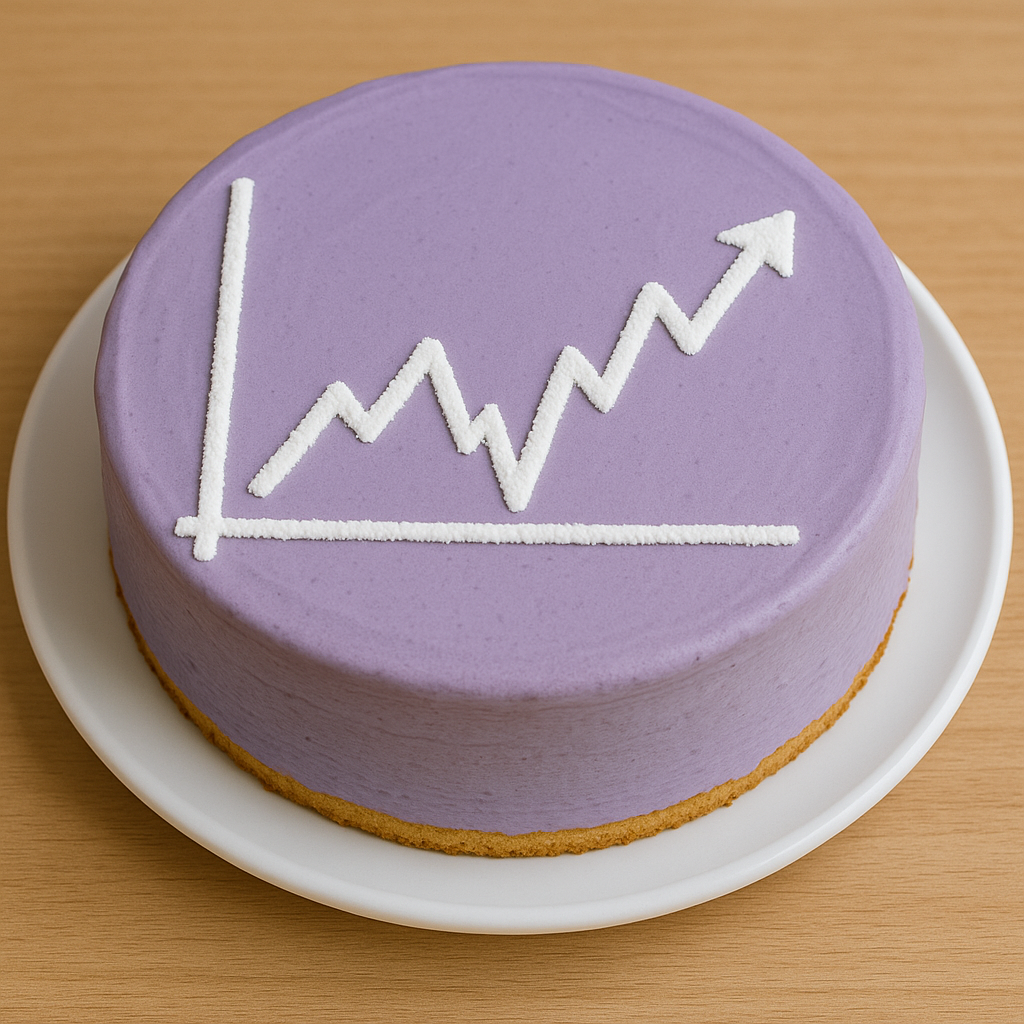

We consider the following variant of the cake-eating problem. It can be
interpreted as a model of sustainable consumption for a renewable
resource.

An agent has a finite amount of cake $k_t$ and must decide in each
period how much of it to consume: $c_t\in[0,k_t]$.

The part of the cake that is not consumed degenerates at rate $\delta$
but new cake is also regenerated at rate $\rho$ so that the law of
motion for the cake is:

$$k_{t+1}=\delta (k_{t}-c_{t}) + \rho$$

with $\delta\in]0,1]$ and $\rho>0$..

The goal is to maximize the present discounted value of utility over an
infinite horizon:

$$\sum_{t\geq0} \beta^t u(c_t)$$

with $u(x) = \frac{x^{1-\sigma}}{1-\sigma}$

We can use the parameters $\beta=0.95$, $\sigma=2$, $\delta=0.9$.

1.  What is the maximal value $\overline{K}$ for the cake that can be
    obtained using natural regeneration? Choose $N>0$ and discretize the
    values for the cake into a vector $K=(K_1, ... ,K_N)$ of linearly
    spaced values.

``` julia
# your code
```

1.  Create a named tuple (or any other Julia construct) to store all
    parameters of the (discretized) model. In what follows, all Julia
    functions will take an additional parameter `m` carrying all these
    informations.

``` julia
# your code
```

Since the transition for the cake is deterministic, we can identify the
choice of consumption with the choice of next period cake. Here we will
make the assumption that next period level must stay on the discretized
grid.

This yields the following, discretized, Bellman equation
$$V(K_i) = \max_{j \in A(i)} U(K_i,K_j) + \beta V(K_j)$$ where $A(i)$ is
the set of all possible cake indices that can be chosen for tomorrow
given today’s index and where $U(K_i,K_j)$ is utility obtained from
consumption today.

1.  What is $U(K_i,K_j)$? Write a function `U(a,b,m)::Float64` to
    represent it in Julia.

``` julia
# your code
```

1.  Write a function `A(i,m)::Tuple{Int, Int}` which maps the index $i$
    of today’s cake $K_i$ with a tuple containing the lowest and highest
    possible indices for the cake tomorrow.

``` julia
# your code
```

1.  Make an initial guess `v0` for the value function represented (a
    vector of `Float64` of length `N`) and an admissible guess `x0` for
    the optimal choices (a vector of `Int64` of length `N`).

``` julia
# your code
```

1.  For the initial guess, plot the values and the consumptions against
    the size of the cake

``` julia
# your code
```

1.  Write a function
    `bellman_step(v::Vector{Float64}, m)::Tuple{Vector{Float64}, Vector{Int64}}`
    which associates $\tilde{V}(K_1), ..., \tilde{V}(K_N)$ to
    $V(K_1), ... V(K_N)$ in
    $$V(K_i) = \max_{j \in A(i)} U(K_i,K_j) + \beta \tilde{V}(K_j)$$
    This function returns the new value and the controls resulting from
    the optimization.

``` julia
# your code
```

1.  Implement the value function algorithm to find the optimal
    consumption policy by iterating on Bellman step until convergence.

``` julia
# your code
```

1.  Plot the optimal consumption rule.

``` julia
# your code
```

1.  Implement the policy iteration algorithm.

``` julia
# your code
```

> **Note**
>
> The policy iteration algorithm can be obtained from the value function
> algorithm: after each bellman step which yields a new policy rule
> $p(i)$, compute the value of this policy, i.e. the value $V$ such
> that:
>
> $$V(K_i) = \left. \left\{U(K_i,K_j) + \beta V(K_j)\right\} \right|_{j=p(i)}$$

1.  Comment on the results (interpret, vary the parameters, …)

``` julia
# your code
```